In [126]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# Problem Definition


###### Apply regression models to predict the next Earning Growth of a company

# Load the data


In [127]:
df_stats = pd.read_csv('../../Dataset/Dataset_clean/stats_UtoD.csv')
df_stats = df_stats.drop(['Unnamed: 0'], axis = 1)
df_stats

,Date,Ticker,Price,DE_Ratio,Trailing_P/E,Price/Sales,Price/Book,Profit_Margin,Operating_Margin,Return_on_Assets,...,Diluted_EPS,Earnings_Growth,Revenue_Growth,Total_Cash,Total_Cash_Per_Share,Total_Debt,Current_Ratio,Book_Value_Per_Share,Cash_Flow,Beta
0,12/7/2003 10:36,AAPL,1.4306,0.072,112.70,1.25,1.84,1.10,0.02,1.06,...,0.185,NaN,7.1,4.570000e+09,12.450,3.040000e+08,2.498,11.520000,NaN,1.742
1,2/3/2004 7:33,AAPL,1.5056,0.070,60.16,1.23,1.92,2.03,1.63,2.08,...,0.371,6.2,8.1,4.790000e+09,12.990,3.020000e+08,2.531,11.740000,NaN,1.749
2,6/3/2004 1:20,AAPL,1.9209,2.921,63.70,1.49,2.33,2.36,2.31,2.54,...,0.454,6.2,8.1,4.590000e+09,12.090,2.921000e+00,2.921,12.042000,3.610000e+08,1.701
3,8/10/2004 2:02,AAPL,2.1320,2.917,54.40,1.51,2.38,2.76,3.00,3.09,...,0.557,6.2,8.1,4.970000e+09,12.800,2.917000e+00,2.917,12.493000,3.610000e+08,1.744
4,10/12/2004 5:40,AAPL,2.5899,2.917,69.28,1.98,3.13,2.76,3.00,3.09,...,0.557,6.2,8.1,4.970000e+09,12.800,2.917000e+00,2.917,12.493000,5.640000e+08,1.802
5,12/4/2004 14:16,AAPL,4.5852,2.632,88.41,3.08,5.03,3.33,3.94,3.86,...,0.709,6.2,8.1,5.460000e+09,13.960,2.632000e+00,2.632,12.968000,5.640000e+08,1.775
6,1/26/2005 15:16,AAPL,4.8869,2.581,57.83,2.99,5.03,5.20,6.71,6.62,...,1.244,300.0,33.4,6.450000e+09,15.940,2.581000e+00,2.581,14.312000,9.340000e+08,1.810
7,2/4/2005 3:07,AAPL,5.3326,2.581,62.55,3.30,5.56,5.20,6.71,6.62,...,1.240,300.0,33.4,6.450000e+09,15.780,2.581000e+00,2.581,14.312000,9.340000e+08,1.810
8,3/1/2005 10:36,AAPL,6.0198,2.581,72.01,1.86,3.11,5.20,6.71,6.63,...,0.620,300.0,33.4,6.450000e+09,7.890,2.581000e+00,2.581,14.312000,1.490000e+09,1.800
9,12/17/2005 11:55,AAPL,9.7413,2.956,45.64,4.37,8.07,9.58,11.84,10.52,...,1.560,305.7,56.5,8.260000e+09,9.802,2.956000e+00,2.956,8.941000,2.540000e+09,NaN


In [128]:
S_P500_List = pd.read_csv('../../Dataset/Dataset_clean/S&P500_List.csv')

In [129]:
for name in S_P500_List.Ticker:
    print(name)

AAPL
ABC
ABT
ADBE
ADI
ADM
ADSK
AEE
AEP
AFL
AIG
AIV
AIZ
AKAM
ALL
ALXN
AMAT
AMGN
AMP
AMT
AMZN
AON
APA
APC
APD
APH
ATVI
AVB
AVY
AXP
AZO
BA
BAC
BAX
BBT
BBY
BDX
BIIB
BK
BLL
BMY
BSX
BWA
BXP
C
CAG
CAH
CAT
CB
CBG
CCI
CCL
CELG
CERN
CF
CHK
CHRW
CI
CINF
CL
CLX
CMA
CME
CMG
CMI
CMS
CNP
COF
COG
COL
COST
CPB
CRM
CSCO
CSX
CTAS
CTL
CTSH
CTXS
CVS
CVX
D
DAL
DE
DFS
DG
DGX
DHI
DHR
DIS
DLTR
DOV
DRI
DUK
DVA
DVN
EA
EBAY
ECL
ED
EFX
EIX
EL
EMN
EMR
EOG
EQR
EQT
ETFC
ETN
ETR
EW
EXC
EXPD
EXPE
F
FAST
FB
FCX
FDX
FE
FFIV
FIS
FISV
FL
FLIR
FLR
FLS
FMC
GD
GILD
GIS
GLW
GM
GPC
GPS
GRMN
GT
GWW
HAL
HAS
HBAN
HCN
HCP
HD
HES
HIG
HOG
HON
HP
HPQ
HRB
HRL
HRS
HST
HSY
HUM
IBM
IFF
INTC
INTU
IP
IPG
IRM
ISRG
ITW
IVZ
JEC
JNPR
JPM
JWN
K
KEY
KIM
KLAC
KMB
KMI
KMX
KO
KR
KSS
KSU
LEG
LEN
LH
LLL
LLY
LMT
LOW
LRCX
LUK
LUV
LYB
M
MA
MAC
MAR
MAS
MAT
MCD
MCHP
MCK
MCO
MET
MKC
MMC
MMM
MNST
MO
MON
MOS
MPC
MRK
MRO
MSFT
MTB
MU
MYL
NBL
NDAQ
NEM
NFLX
NFX
NKE
NOV
NSC
NTAP
NTRS
NUE
NVDA
NWL
NWSA
OKE
OMC
ORLY
OXY
PAYX
PBCT
PCAR
PCG
PCLN
PDCO
PEG
PEP
PFE
PFG
P

# Feature Engineering

In [130]:
X_columns = ['Market_Cap', 'Enterprise_Value', 'Revenue', 'Revenue_Growth']
y_column = ['Earnings_Growth']

# Model Training

In [131]:
columns_kept = ['Date', 'Ticker'] + X_columns + y_column
df_stats = df_stats[columns_kept]

# Discard NaN values
df_stats = df_stats.dropna()
df_stats = df_stats.reset_index(drop = True)
df_stats

,Date,Ticker,Market_Cap,Enterprise_Value,Revenue,Revenue_Growth,Earnings_Growth
0,2/3/2004 7:33,AAPL,8.230000e+09,3.830000e+09,0.57,8.1,6.2
1,6/3/2004 1:20,AAPL,1.099000e+10,6.070000e+09,0.85,8.1,6.2
2,8/10/2004 2:02,AAPL,1.175000e+10,6.590000e+09,0.86,8.1,6.2
3,10/12/2004 5:40,AAPL,1.497000e+10,1.019000e+10,1.33,8.1,6.2
4,12/4/2004 14:16,AAPL,2.454000e+10,2.006000e+10,2.42,8.1,6.2
5,1/26/2005 15:16,AAPL,2.910000e+10,2.270000e+10,2.33,33.4,300.0
6,2/4/2005 3:07,AAPL,3.148000e+10,2.609000e+10,2.67,33.4,300.0
7,3/1/2005 10:36,AAPL,1.833000e+10,3.021000e+10,3.09,33.4,300.0
8,12/17/2005 11:55,AAPL,5.993000e+10,5.167000e+10,3.71,56.5,305.7
9,1/25/2006 9:43,AAPL,6.408000e+10,5.675000e+10,3.51,64.7,91.5


In [132]:
tickerGroups = df_stats.groupby(['Ticker'], as_index = False)
tickerGroups

In [195]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from statsmodels.formula.api import ols

In [196]:
# Declare empty frames
dfs_X_train = []
dfs_X_test = []
dfs_y_train = []
dfs_y_test = []
columns_kept = ['Ticker'] + X_columns + ['MAE', 'RMSE']
dfs_fit = pd.DataFrame(columns = columns_kept)
# Start the model
model = RandomForestRegressor(n_estimators=10)

index = 0
for stock in df_stats['Ticker'].unique():
    
    # Filtering the dataframe
    df_filter = df_stats[df_stats['Ticker']==stock].copy()
    # Caluclate the required value to split the dataset
    head_split = int(len(df_filter)*0.8)
    tail_split = len(df_filter) - head_split
    # Define the training-testing set
    X_train = df_filter.head(head_split)[X_columns]
    X_test = df_filter.tail(tail_split)[X_columns]
    y_train = df_filter.head(head_split)[y_column]
    y_test = df_filter.tail(tail_split)[y_column]
    
    # Compute the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    
    dfs_fit.loc[index, ['Ticker']] = stock

    for i in range(len(X_columns)):
        dfs_fit.loc[index, [X_columns[i]]] = model.feature_importances_[i].round(4)
    
    dfs_fit.loc[index, 'MAE'] = mean_absolute_error(y_test, y_pred)
    dfs_fit.loc[index, 'RMSE'] = np.sqrt(mean_squared_error(y_test, y_pred))
    
    dfs_X_train.append(X_train)
    dfs_X_test.append(X_test)
    dfs_y_train.append(y_train)
    dfs_y_test.append(y_test)

    index += 1

dfs_X_train = pd.concat(dfs_X_train)
dfs_X_test = pd.concat(dfs_X_test)
dfs_y_train = pd.concat(dfs_y_train)
dfs_y_test = pd.concat(dfs_y_test)


C:\Users\Jackson\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Jackson\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Jackson\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Jackson\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Jackson\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: DataConversionWarning: A 

# Model Evaluation

In [197]:
dfs_fit

,Ticker,Market_Cap,Enterprise_Value,Revenue,Revenue_Growth,MAE,RMSE
0,AAPL,0.1138,0.2027,0.1537,0.5297,23.2812,27.4368
1,ABC,0.0795,0.0052,0.1085,0.8069,25.4367,26.6806
2,ABT,0.2367,0.1678,0.5899,0.0056,46.355,47.0644
3,ADBE,0.3904,0.1497,0.2855,0.1744,27.7967,36.1838
4,ADI,0.1538,0.0367,0.5423,0.2673,50.676,62.5653
5,ADM,0.179,0.2391,0.2177,0.3643,34.45,40.3085
6,ADSK,0.1247,0.6228,0.0825,0.1701,18.455,20.8003
7,AEE,0.1974,0.306,0.0111,0.4855,18.6433,24.9541
8,AEP,0.4094,0.2,0.1904,0.2002,83.32,92.2174
9,AFL,0.2121,0.3587,0.1884,0.2408,25.6267,41.3022


In [ ]:
'''
To be further investigated
Certain stocks' important features have values of 0
'''

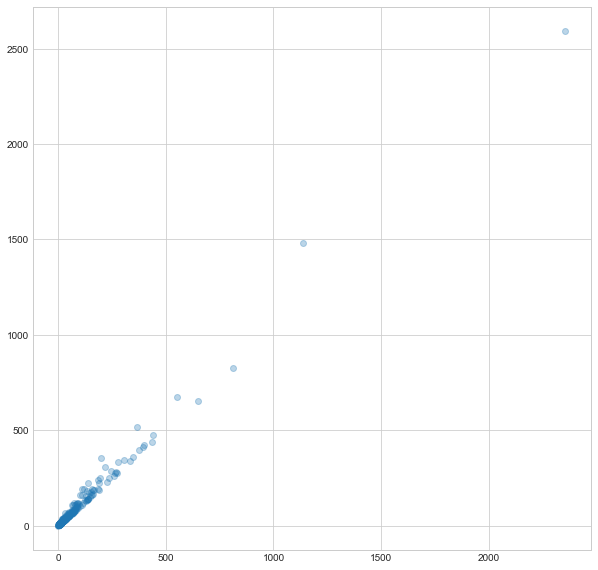

In [214]:
plt.figure(figsize = (10, 10))
plt.scatter(dfs_fit['MAE'], dfs_fit['RMSE'], alpha = 0.3)
plt.show()

In [220]:
dfs_fit.sort_values('MAE', ascending = False).head(1)


,Ticker,Market_Cap,Enterprise_Value,Revenue,Revenue_Growth,MAE,RMSE
81,D,0.0806,0.6995,0.1002,0.1197,2356.59,2589.74


In [230]:
df_stats.loc[df_stats['Ticker'] == 'D']

,Date,Ticker,Market_Cap,Enterprise_Value,Revenue,Revenue_Growth,Earnings_Growth
1369,2/28/2004 10:45,D,2.038000e+10,3.717000e+10,3.07,3.2,150.4
1370,7/8/2004 9:02,D,2.068000e+10,3.909000e+10,3.16,18.2,76.7
1371,1/31/2005 13:32,D,2.271000e+10,4.016000e+10,2.87,18.2,76.7
1372,10/23/2006 12:24,D,2.828000e+10,4.664000e+10,2.57,2.5,51.5
1373,2/19/2007 12:33,D,3.062000e+10,4.917000e+10,2.79,11.6,4260.0
1374,5/7/2009 12:35,D,3.576000e+10,3.576000e+10,2.19,48.7,16.4
1375,5/20/2011 3:02,D,4.582000e+10,4.582000e+10,3.04,2.7,175.3
1376,8/17/2011 8:21,D,4.755000e+10,4.755000e+10,3.15,0.2,80.9
1377,4/29/2013 15:49,D,5.666000e+10,5.666000e+10,4.29,1.8,0.2


In [ ]:
'''
From the above figure, it shows that the model established for each sotck has small values of both MAE and RMSE 
However, it does have certain records where the error is much higher. This could be due to abnormal behaviour in the selected feature
'''